# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
-  Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         |    object    |
| id_cliente              |  Código de identificação do cliente |     int64    |
| sexo                    |  Sexo do cliente                                      |    object    |
| posse_de_veiculo        |  Indica se o cliente possui veículo                                      |     bool     |
| posse_de_imovel         | Indica se o cliente possui imóvel             | bool|
| qtd_filhos              |  Quantidade de filhos do cliente          | int64|
| tipo_renda              | Tipo de renda do cliente                  | object|
| educacao                |Grau de instrução do cliente                | object|
| estado_civil            | Estado civil do cliente                             | object|
| tipo_residencia         |Tipo de residência do cliente (própria, alugada etc)  | object|
| idade                   | Idade do cliente                               | int64|
| tempo_emprego           |  Tempo no emprego atual                            | float64|
| qt_pessoas_residencia   |Quantidade de pessoas que moram na residência            | float64|
| renda                   |  Renda em reais                | float64|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from warnings import simplefilter

%matplotlib inline
simplefilter(action='ignore', category=FutureWarning)

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [60]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.drop(axis=1,columns=['Unnamed: 0'],inplace=True)

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [61]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Agora, vamos gerar nossos gráficos de distribuição para cada variavel. Começando pela variável target(renda)

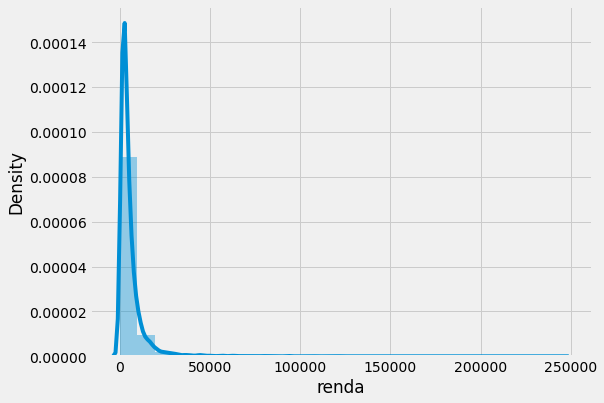

In [103]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(renda.renda, bins = 25);

Até o momento a única informação que temos é que existe uma maior concentração entre 0 e mais ou menos 15000. Seria mais interessante plotarmos um gráfico de boxplot para uma melhor avaliação da distribuição desses dados, além disso podemos facilmente descobrir se temos outliers.

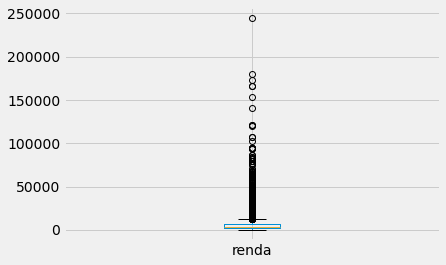

In [104]:
renda.renda.plot.box();

Apesar de confuso , esse gráfico acaba de nos dar uma informação muito importante, temos outliers na nossa variável alvo. Podemos facilmente afirmar que os valores de renda acima de 10000  são outliers. Trataremos disso mais a frente.

## Será que temos mais clientes do sexo masculino ou do sexo feminino? 

In [105]:
renda['sexo'].value_counts()

F    10119
M     4881
Name: sexo, dtype: int64

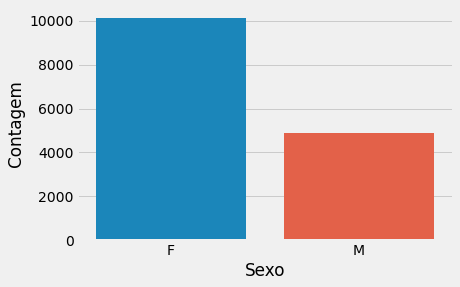

In [106]:
sns.countplot(renda['sexo'])
plt.xlabel('Sexo')
plt.ylabel('Contagem');

## Quantos clientes possuem veículo e quantos não possuem ?

In [107]:
renda.posse_de_veiculo.value_counts()

False    9140
True     5860
Name: posse_de_veiculo, dtype: int64

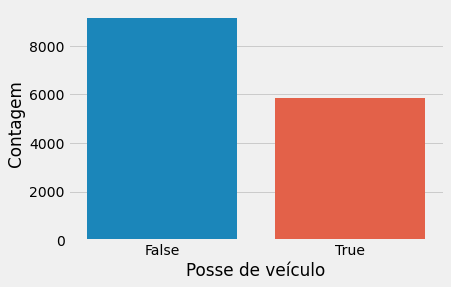

In [108]:
sns.countplot(renda['posse_de_veiculo'])
plt.xlabel('Posse de veículo')
plt.ylabel('Contagem');

## Quantos clientes possuem imóvel e quantos não possuem ?

In [109]:
renda['posse_de_imovel'].value_counts()

True     10143
False     4857
Name: posse_de_imovel, dtype: int64

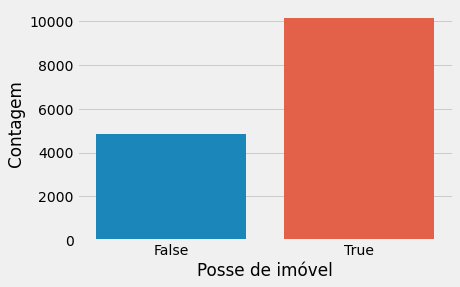

In [110]:
sns.countplot(renda['posse_de_imovel'])
plt.xlabel('Posse de imóvel')
plt.ylabel('Contagem');

## Vamos ver a distribuição da quantidade de filhos dos clientes.

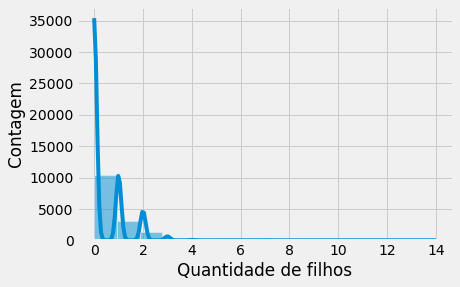

In [111]:
sns.histplot(renda['qtd_filhos'],kde=True,bins=15)
plt.xlabel('Quantidade de filhos')
plt.ylabel('Contagem');

In [112]:
renda.qtd_filhos.describe()

count    15000.000000
mean         0.432333
std          0.746631
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         14.000000
Name: qtd_filhos, dtype: float64

Conseguimos constatar que pelo menos 50% dos clientes não tem filhos.

### Agora vamos ver as distribuições dos tipos de renda dos clientes.

In [113]:
renda['tipo_renda'].value_counts()

Assalariado         7633
Empresário          3508
Pensionista         2582
Servidor público    1268
Bolsista               9
Name: tipo_renda, dtype: int64

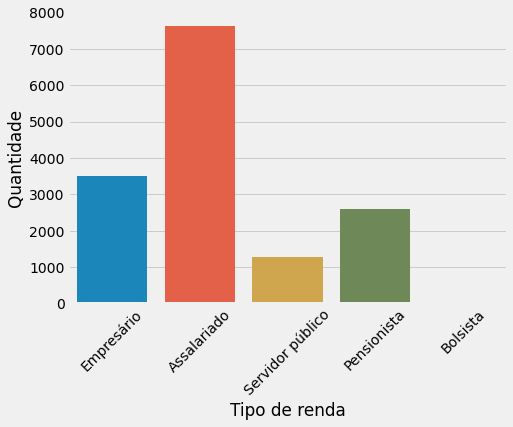

In [114]:
plt.figure(figsize=(7,5))
sns.countplot(renda['tipo_renda'])
plt.xticks(rotation=45)
plt.xlabel('Tipo de renda')
plt.ylabel('Quantidade');

Do gráfico acima , podemos vem quem o tipo de renda mais frequente é o Assalariado , e que o tipo de renda bolsista é irrelevante por ter somente 9 amostras.

## Agora vamos ver a escolaridade dos clientes.

In [115]:
renda['educacao'].value_counts(normalize=True)

Secundário             0.593000
Superior completo      0.355667
Superior incompleto    0.038600
Primário               0.011000
Pós graduação          0.001733
Name: educacao, dtype: float64

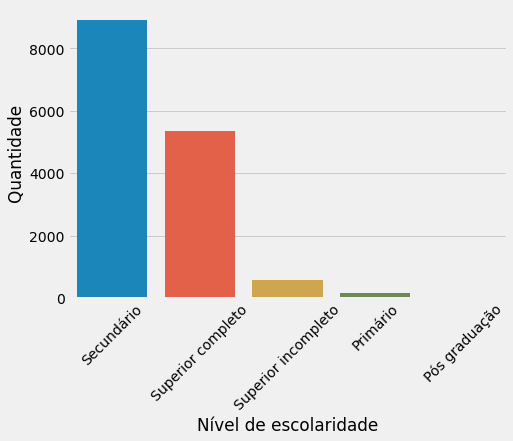

In [116]:
plt.figure(figsize=(7,5))
sns.countplot(renda['educacao'])
plt.xticks(rotation=45)
plt.xlabel('Nível de escolaridade')
plt.ylabel('Quantidade');

Aqui vemos que mais de 50% dos clientes tem o ensino médio completo.

## Visualizando a distribuição do estado civil dos clientes.

In [117]:
renda['estado_civil'].value_counts(normalize=True)

Casado      0.702267
Solteiro    0.119867
União       0.071867
Separado    0.058600
Viúvo       0.047400
Name: estado_civil, dtype: float64

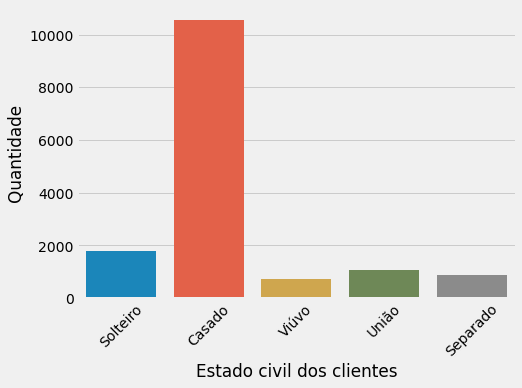

In [118]:
plt.figure(figsize=(7,5))
sns.countplot(renda['estado_civil'])
plt.xticks(rotation=45)
plt.xlabel('Estado civil dos clientes')
plt.ylabel('Quantidade');

70% dos clientes são casados.

## Tipos de residência dos clientes

In [119]:
renda['tipo_residencia'].value_counts(normalize=True)

Casa             0.902133
Com os pais      0.045000
Governamental    0.030133
Aluguel          0.012933
Estúdio          0.005533
Comunitário      0.004267
Name: tipo_residencia, dtype: float64

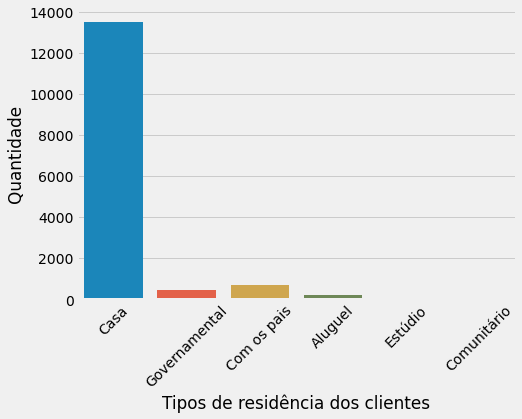

In [120]:
plt.figure(figsize=(7,5))
sns.countplot(renda['tipo_residencia'])
plt.xticks(rotation=45)
plt.xlabel('Tipos de residência dos clientes')
plt.ylabel('Quantidade');

Aqui vemos que o tipo de residência Casa é o mais predominante, com 90% da amostra. Isso pode mostrar que essa variavel não seja relevante para o modelo preditivo.

## Análise das idades.

In [121]:
renda['idade'].describe().round(2)

count    15000.00
mean        43.88
std         11.27
min         22.00
25%         34.00
50%         43.00
75%         53.00
max         68.00
Name: idade, dtype: float64

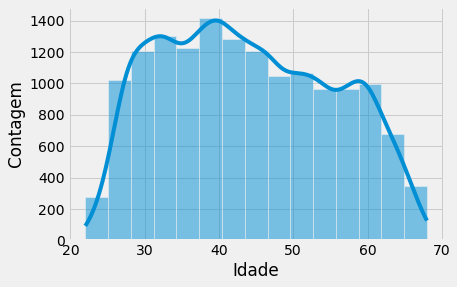

In [122]:
sns.histplot(renda['idade'],kde=True,bins=15)
plt.xlabel('Idade')
plt.ylabel('Contagem');

As idades dos clientes estão bem distribuidas entre 25 e 60 anos de idade. Tendo como média de idade dos clientes como 43 anos.

## Distribuição do tempo de emprego dos clientes.

In [123]:
renda['tempo_emprego'].describe().round(2)

count    12427.00
mean         7.72
std          6.71
min          0.12
25%          2.97
50%          6.01
75%         10.12
max         42.91
Name: tempo_emprego, dtype: float64

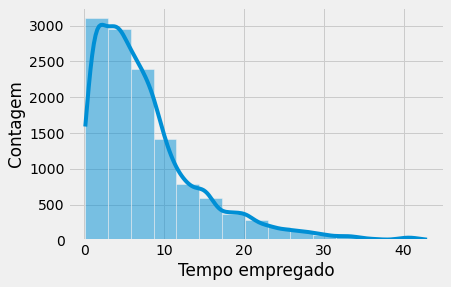

In [124]:
sns.histplot(renda['tempo_emprego'],kde=True,bins=15)
plt.xlabel('Tempo empregado')
plt.ylabel('Contagem');

Podemos ver que o tempo de emprego se concentra entre 0 e 10 anos. Vamos verificar um boxplot para ver se temos outliers nessa variavel

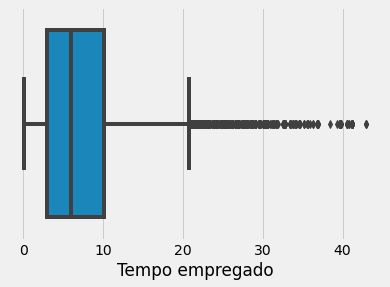

In [127]:
sns.boxplot(renda['tempo_emprego'])
plt.xlabel('Tempo empregado');

E sim. Conseguimos afirmar com esse gráfico que tempo de emprego maior que 20 são outliers.

## E para finalizar nossa análise univariada , vamos ver a distribuição da quantidade de pessoas em uma residência.

In [130]:
renda['qt_pessoas_residencia'].describe().round(2)

count    15000.00
mean         2.21
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         15.00
Name: qt_pessoas_residencia, dtype: float64

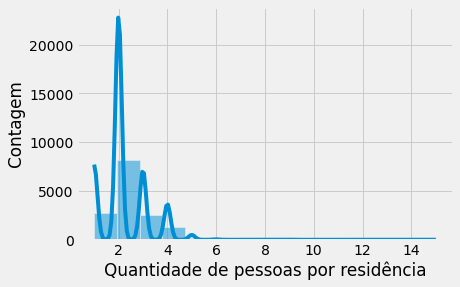

In [129]:
sns.histplot(renda['qt_pessoas_residencia'],kde=True,bins=15)
plt.xlabel('Quantidade de pessoas por residência')
plt.ylabel('Contagem');

Aqui vemos que a maior parte dos cliente mora com mais uma pessoas. E novamente iremos usar o boxplot para verificar outliers.

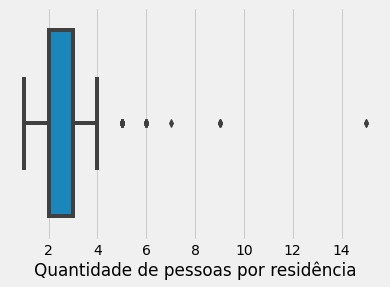

In [132]:
sns.boxplot(renda['qt_pessoas_residencia'])
plt.xlabel('Quantidade de pessoas por residência');

Mais outliers. Residências com mais de 4 pessoas , são considerados outliers.

### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.